In [1]:
# The qiskit modules to import
from qiskit import assemble, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector

# Other modules to import
from math import sqrt, pi
import numpy as np

# Helper function to get spherical coordinates on Bloch sphere from state vector
def get_spherical_coordinates_from_statevector(statevector):
    # Convert to polar form:
    r0 = np.abs(statevector[0])
    phi0 = np.angle(statevector[0])

    r1 = np.abs(statevector[1])
    phi1 = np.angle(statevector[1])

    # Calculate the coordinates:
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    theta = 2 * np.arccos(r0 / r)
    phi = phi1 - phi0
    return [r, theta, phi]

# Introduction to quantum gates with QISKit

This notebook introduces quantum logic gates in QISKit. After working through this notebook a user will have knowledge about quantum logic gates, how they operate on qubits, and how they are implemented in QISKit. Quantum logic gates (along with qubits) form all the needed components to create a quantum circuit.

## Quantum logic gates
Recall that a single qubit is represented as a 2-D column vector. Operations on a single qubit are achieved by  multiplying the vector with a $2 \times 2$ matrix. If we have a 2-D column vector $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and a $ 2 \times 2$ matrix $A = \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{bmatrix}$, we can multiply them together as follows:

$$
Ax = 
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22}\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
= 
\begin{bmatrix} a_{11}x_1 + a_{12}x_2\\ a_{21}x_1 + a_{22}x_2 \end{bmatrix}.
$$

A high-level perspective of $2\times 2$ matrix-vector multiplication is that it is a transforms one vector to another vector. The details of how the transformation works are encoded in the matrix. 

### Single qubit gate
Let's take a look at a single qubit gate. We will see how the following two gates work:
1. X-gate (NOT),
1. H-gate (Hadamard).

The Pauli X-gate has the form
$$
X = 
\begin{bmatrix} 0 & 1 \\ 1 & 0\end{bmatrix}.
$$


The Hadamard H-gate has the form:
$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}.
$$

We will also use these examples to see how the gates transform the qubit on the Bloch sphere. By default, qiskits are initialized to the 0-state. We plot the 0-state qubit using spherical coordinates on the Bloch sphere below.

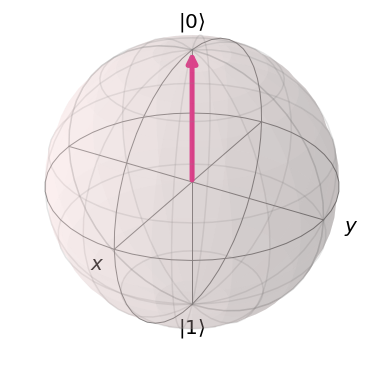

In [2]:
plot_bloch_vector([1, 0, 0], coord_type='spherical')

### The X-gate
Qubits are by default initialized to zero in QISKit. In the below circuit we apply an X-gate and then measure the state of the qubit. Observe what happens.

In [3]:
sim = Aer.get_backend('aer_simulator')

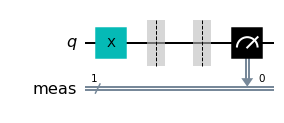

In [4]:
qc = QuantumCircuit(1)
qc.x(0)
qc.save_statevector()
qc.measure_all()
qc.draw(output='mpl')

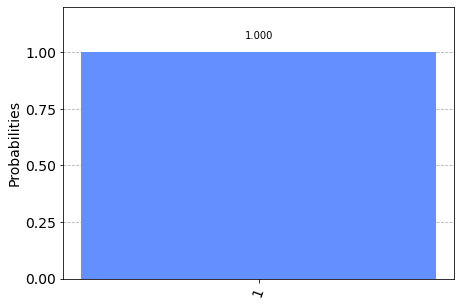

In [5]:
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

With 100% probability we measure the qubit in the 1-state.

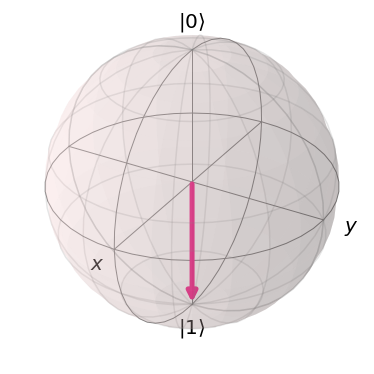

In [6]:
statevector = result.get_statevector()
plot_bloch_vector(get_spherical_coordinates_from_statevector(statevector), coord_type='spherical')

We also see that the original 0-state has been mapped to the 1-state on the Bloch sphere.

### The Hadamard gate
Below we consider the action of The Hadamard gate. Observe what happens to the initial 0-state after the Hadamard gate is applied.

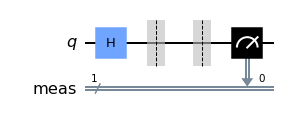

In [7]:
qc = QuantumCircuit(1)
qc.h(0)
qc.save_statevector()
qc.measure_all()
qc.draw(output='mpl')

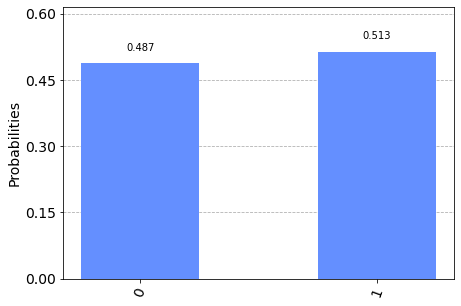

In [8]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

We now see that there is a 50% probability of measuring the qubit as either a 0 or a 1. What has happened to the Bloch sphere?

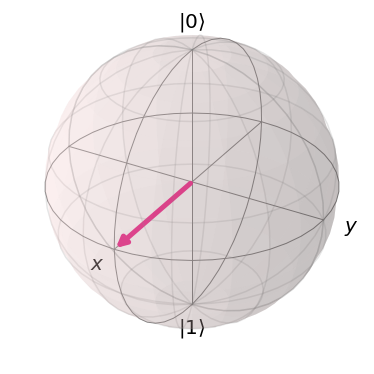

In [9]:
statevector = result.get_statevector()
plot_bloch_vector(get_spherical_coordinates_from_statevector(statevector), coord_type='spherical')

The original 0-state has been mapped directly between the 0 and 1-states. This shows how the Hadamard gate takes a zero state to an equal superposition of the 0 and 1-states.

## 2-qubit gates
Let's explore our first 2-qubit gate. This is the CNOT gate. It has a matrix form of:
$$
CNOT = 
\begin{bmatrix} 
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}.
$$

Since we operate on 2-qubits, we have a matrix that is of size $4 \times 4$. If we had 5 qubits, what would the dimension of the matrix be?

In this example we start with 2 qubits that are by default initalized as 0, so we have the state $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{00}$. Since the control (first) qubit is zero, and the target (second) qubit is zero, the final output will also be in the $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{00}$ state.

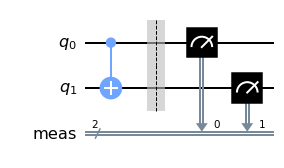

In [10]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

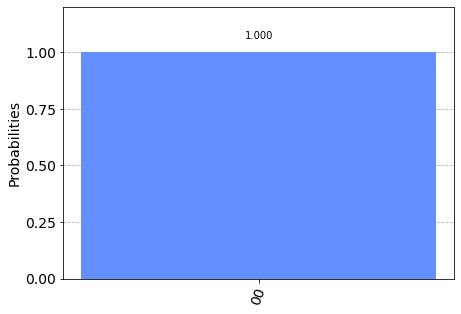

In [11]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

Let's not take a look at initializing the first qubit to the 1-state, so that we have $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{10}$ and apply the CNOT gate here.

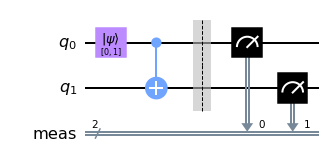

In [12]:
qc = QuantumCircuit(2)
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

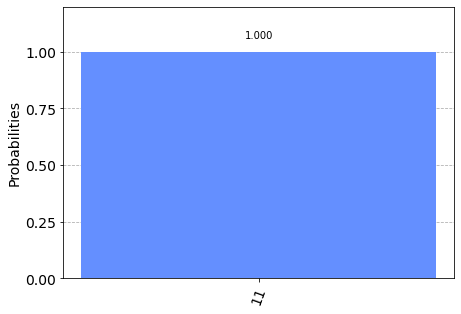

In [13]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In this example we started the state $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{10}$. Since the control (first) qubit is 1, and the target (second) qubit is zero, the final output will is now $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{11}$ state.

### Entanglement
Here, we will demonstrate how to create an entangled qubit state. In fact, with just 2 gate operations we can create an entangled state.

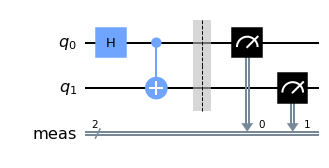

In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

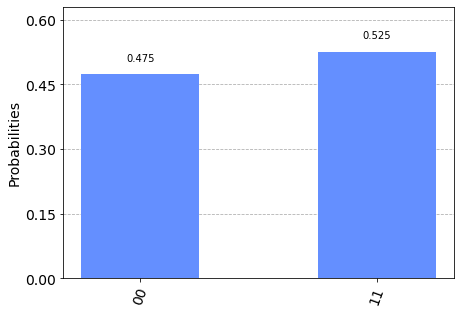

In [15]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

Why do we care about entangled states?
Introduce the importance here.